# **simple linear regression**

In [ ]:
#importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/ybifoundation/Dataset/main/Salary%20Data.csv")
data.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [ ]:
#Checking for any missing data
data.isna().sum()

,0
Experience Years,0
Salary,0


In [ ]:
#splitting the input and target variable
input,target = data[["Experience Years"]],data["Salary"]

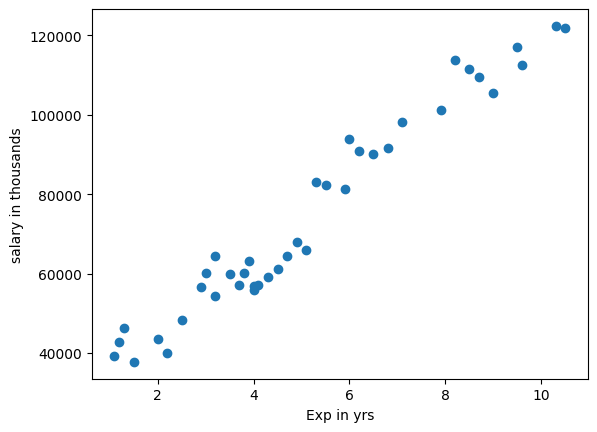

In [ ]:
#Lookout how the data is
plt.scatter(input,target)
plt.xlabel("Exp in yrs")
plt.ylabel("salary in thousands")
plt.show()

In [ ]:
#splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2)

In [ ]:
#model building
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
print(model.coef_  , model.intercept_)

[9606.80898943] 25078.48616218676


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
r2_score(prediction,y_test)

0.9237450478644714

In [ ]:
mean_absolute_error(prediction,y_test)

5113.07986293524

In [ ]:
mean_absolute_percentage_error(prediction,y_test)

0.08877857824823829

In [ ]:
mean_squared_error(prediction,y_test)

37588635.90408091

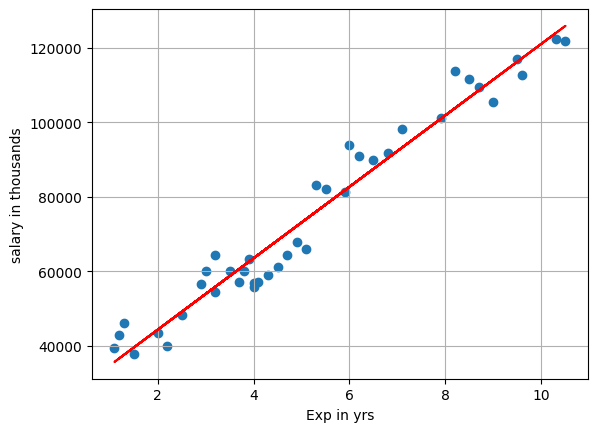

In [ ]:
#plotting the best fit line
plt.scatter(input,target)
plt.plot(X_train,model.predict(X_train),color='red')
plt.xlabel("Exp in yrs")
plt.ylabel("salary in thousands")
plt.grid(True)
plt.show()

# **Multivariate Linear Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#check for the null
df.info()
df.isna().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#splitting of target and features
target = df['MEDV']
features = df.drop(['MEDV'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [ ]:
#model fitting
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)

In [ ]:
print(model.coef_  , model.intercept_)

[-1.04518871e-01  4.62797395e-02  6.13762810e-02  2.72954721e+00
 -2.02443821e+01  3.64857923e+00  3.73987825e-03 -1.59274852e+00
  2.95914324e-01 -1.17325963e-02 -1.01359148e+00  6.75597540e-03
 -5.83130267e-01] 41.32119407025982


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [ ]:
r2_score(y_test, pred)

0.7382511291278512

In [ ]:
mean_absolute_error(y_test,pred)

2.9794689733833124

In [ ]:
mean_absolute_percentage_error(y_test, pred)

0.15422153097002997

In [ ]:
mean_squared_error(y_test, pred)

17.122272701090118

In [20]:
import hashlib
import hmac
import json

# Secret key (same as provided in the JavaScript example)
secret_key = b"P3BJiKohGrql2bAmDlj8Jy0K1OMiLGqG"  # This should be in bytes

# Data to be hashed (equivalent to `n` in the JavaScript example)
n = {
    "method": "step2",
    "vehiclecategorytypeid": 0,
    "pickuplocationid": "1",
    "pickupdate": "09/11/2024",
    "pickuptime": "11:00",
    "dropofflocationid": "1",
    "dropoffdate": "16/11/2024",
    "dropofftime": "11:00",
    "ageid": 4,
    "campaigncode": "",
    "agentcode": ""
}

# Step 1: Convert the dictionary to a JSON string with sorted keys for consistency
json_data = json.dumps(n)

# Debugging: Print the JSON data to ensure consistency
print("JSON data to be hashed:", json_data)

# Step 2: Initialize the HMAC object (similar to setting the key in JS)
hmac_object = hmac.new(secret_key, digestmod=hashlib.sha256)
print(hmac_object)

# Step 3: Update the HMAC object with the JSON data
hmac_object.update(json_data.encode())  # Encoding to bytes before updating

# Step 4: Get the HMAC in hexadecimal format (this corresponds to `getHMAC("HEX")` in JS)
signature = hmac_object.hexdigest()

# Output the result (signature)
print("Generated signature:", signature)


JSON data to be hashed: {"method": "step2", "vehiclecategorytypeid": 0, "pickuplocationid": "1", "pickupdate": "09/11/2024", "pickuptime": "11:00", "dropofflocationid": "1", "dropoffdate": "16/11/2024", "dropofftime": "11:00", "ageid": 4, "campaigncode": "", "agentcode": ""}
Generated signature: fee4102428ae6d3bf6b5698d0962848ea82874ec0ef10ffdcd8b8a43da88db83


In [21]:
import hmac
import hashlib
import json

def verify_hmac_signature(secret_key, data, received_signature):
    """
    Verifies if the received HMAC signature matches the expected signature generated using the secret key and data.

    :param secret_key: The secret key used for HMAC (must be the same used for signature generation)
    :param data: The data (usually JSON) that was used to generate the HMAC signature
    :param received_signature: The signature received from the server or request
    :return: True if signatures match, False if they don't
    """

    # Convert the data dictionary to a JSON string with sorted keys to ensure consistency
    json_data = json.dumps(data, separators=(',', ':'), sort_keys=True)
    print("JSON Data for HMAC Generation:", json_data)  # Debugging: Output the JSON data

    # Generate the HMAC signature with the same key and data
    hmac_object = hmac.new(secret_key.encode(), json_data.encode(), hashlib.sha256)
    generated_signature = hmac_object.hexdigest()
    print("Generated HMAC Signature:", generated_signature)  # Debugging: Output the generated signature

    # Compare the received signature with the generated one
    if generated_signature == received_signature:
        print("Signature is valid!")
        return True
    else:
        print("Signature is invalid!")
        print("Received Signature:", received_signature)  # Debugging: Output the received signature
        return False

# Example usage:
secret_key = "P3BJiKohGrql2bAmDlj8Jy0K1OMiLGqG"  # Secret key (same as used in signature generation)
data = {
    "method": "step2",
    "vehiclecategorytypeid": 0,
    "pickuplocationid": "1",
    "pickupdate": "09/11/2024",
    "pickuptime": "10:00",
    "dropofflocationid": "1",
    "dropoffdate": "16/11/2024",
    "dropofftime": "10:00",
    "ageid": 4,
    "campaigncode": "",
    "agentcode": ""
}

# Received signature (the signature you want to verify)
received_signature = "bea03a87ab8cc643b34b862501e9ed94c7b9ac8d24af6130cf00582d28cc40fc"

# Verify the signature
verify_hmac_signature(secret_key, data, received_signature)


JSON Data for HMAC Generation: {"ageid":4,"agentcode":"","campaigncode":"","dropoffdate":"16/11/2024","dropofflocationid":"1","dropofftime":"10:00","method":"step2","pickupdate":"09/11/2024","pickuplocationid":"1","pickuptime":"10:00","vehiclecategorytypeid":0}
Generated HMAC Signature: a405c8c0134fe3fdfab4a5a22da6d26ee19eb667cbb7ddc164570679f2d52c3d
Signature is invalid!
Received Signature: bea03a87ab8cc643b34b862501e9ed94c7b9ac8d24af6130cf00582d28cc40fc


False